# 📊 Exploratory Data Analysis, Part 1: Uncovering Initial Insights

### 🎯 Objective
With our clean and merged dataset, we can now move from data wrangling to analysis. The goal of this notebook is to perform initial EDA to answer some foundational questions about the movie industry. We will start by exploring the characteristics of movie genres and then dive into the careers of directors.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("../temp/maindfs/maindf.csv")

In [7]:
df.rename(columns={"personID_y": "cast", "personID_x": "crew"}, inplace=True)
df

,movieID,title,year,runtime,genre,rating,votes,directors,writers,crew,role,name,cast,category
0,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait,"['nm0846887', 'nm0846894', 'nm1431224', 'nm300...","['actress', 'actor', 'actor', 'actor', 'actor'..."
1,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait,"['nm0846887', 'nm0846894', 'nm1431224', 'nm300...","['actress', 'actor', 'actor', 'actor', 'actor'..."
2,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,director,Charles L. Gaskill,"['nm0306947', 'nm0801774', 'nm0276160', 'nm073...","['actress', 'actress', 'actress', 'actress', '..."
3,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0765026,writer,Victorien Sardou,"['nm0306947', 'nm0801774', 'nm0276160', 'nm073...","['actress', 'actress', 'actress', 'actress', '..."
4,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,writer,Charles L. Gaskill,"['nm0306947', 'nm0801774', 'nm0276160', 'nm073...","['actress', 'actress', 'actress', 'actress', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216017,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm10538402,writer,Lorenzo Collalti,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr..."
216018,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm5584269,writer,Alessandro Regaldo,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr..."
216019,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,director,Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."
216020,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,writer,Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."


In [8]:
df.drop(columns=["crew",'role'], inplace=True)

In [9]:
df.columns

Index(['movieID', 'title', 'year', 'runtime', 'genre', 'rating', 'votes',
       'directors', 'writers', 'name', 'cast', 'category'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216022 entries, 0 to 216021
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieID    216022 non-null  object 
 1   title      216022 non-null  object 
 2   year       216022 non-null  int64  
 3   runtime    216022 non-null  int64  
 4   genre      216022 non-null  object 
 5   rating     216022 non-null  float64
 6   votes      216022 non-null  float64
 7   directors  216022 non-null  object 
 8   writers    216022 non-null  object 
 9   name       216022 non-null  object 
 10  cast       216015 non-null  object 
 11  category   216015 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 19.8+ MB


In [11]:
df.describe()

,year,runtime,rating,votes
count,216022.000000,216022.000000,216022.000000,2.160220e+05
mean,1997.622205,103.845307,6.099948,2.137330e+04
std,25.210097,23.522813,1.195368,9.130906e+04
min,1906.000000,30.000000,1.000000,5.010000e+02
25%,1984.000000,90.000000,5.400000,8.990000e+02
50%,2007.000000,99.000000,6.300000,1.934000e+03
75%,2017.000000,113.000000,6.900000,6.615000e+03
max,2025.000000,808.000000,9.600000,3.079063e+06


In [12]:
df['genre'].value_counts()


genre
Drama                         18479
Comedy                        13408
Comedy,Drama                   9414
Drama,Romance                  8423
Comedy,Drama,Romance           7077
                              ...  
Documentary,Horror,Romance        2
Documentary,Music,News            2
Drama,Mystery,Sport               2
Action,Documentary,History        2
Animation,Crime,Horror            2
Name: count, Length: 836, dtype: int64

In [13]:
df['name'].value_counts()

name
Jesús Franco           118
William Shakespeare    110
Ben Hecht              108
Woody Allen            107
Jean-Luc Godard         97
                      ... 
Allen Ginsberg           1
Alok Jain                1
Raghu Tirumala           1
Clare Dunne              1
Laura Megan Stahl        1
Name: count, Length: 72301, dtype: int64

Considering a viable dataset for analysis

In [14]:
df=df[df['year']>1950]
df=df[df['votes']>500]

In [15]:
df.shape

(199331, 12)

In [16]:
genre_df=df.copy()
genre_df['genre'] = genre_df['genre'].str.split(',')
genre_df= genre_df.explode('genre')
genre_df['genre'].unique()

array(['Comedy', 'Fantasy', 'Romance', 'Documentary', 'War', 'Drama',
       'Horror', 'Action', 'Adventure', 'Film-Noir', 'Crime', 'Musical',
       'Mystery', 'Family', 'Animation', 'Western', 'Thriller', 'Sport',
       'History', 'Sci-Fi', 'Biography', 'Music', 'News', 'Adult'],
      dtype=object)

In [17]:
genre_df['genre'].unique().__len__()

24

In [18]:
df['primary_genre'] = df['genre'].apply(lambda g: g.split(',')[0] if isinstance(g, str) else (g[0] if g else 'Unknown'))

In [19]:
df['primary_genre'].value_counts()

primary_genre
Comedy         53445
Drama          47550
Action         37413
Adventure      13492
Crime          13380
Horror         12538
Biography       7801
Documentary     5008
Animation       2252
Thriller        1786
Fantasy         1128
Mystery          898
Romance          841
Sci-Fi           538
Family           499
Musical          181
Western          154
History          117
Adult            102
Music             90
War               61
Sport             46
Film-Noir         11
Name: count, dtype: int64

In [20]:
df

,movieID,title,year,runtime,genre,rating,votes,directors,writers,name,cast,category,primary_genre
10705,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy
10706,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",Steven Rogers,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy
10707,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy
13076,tt0038687,Let There Be Light,1980,58,"Documentary,War",7.4,2114.0,nm0001379,"nm0001379,nm0442105",John Huston,"['nm0404158', 'nm3455274']","['actor', 'self']",Documentary
13077,tt0038687,Let There Be Light,1980,58,"Documentary,War",7.4,2114.0,nm0001379,"nm0001379,nm0442105",John Huston,"['nm0404158', 'nm3455274']","['actor', 'self']",Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216017,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",Lorenzo Collalti,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr...",Thriller
216018,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",Alessandro Regaldo,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr...",Thriller
216019,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr...",Drama
216020,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr...",Drama


Feature Engineering

In [21]:
df['logvotes']=np.log1p(df['votes'])
df['logvotes']

10705     11.432799
10706     11.432799
10707     11.432799
13076      7.656810
13077      7.656810
            ...    
216017     7.321850
216018     7.321850
216019     8.715880
216020     8.715880
216021     8.715880
Name: logvotes, Length: 199331, dtype: float64

In [22]:
df['is_good'] = (df['rating'] >= 7.0).astype(int)
df['is_good']

10705     0
10706     0
10707     0
13076     1
13077     1
         ..
216017    0
216018    0
216019    0
216020    0
216021    0
Name: is_good, Length: 199331, dtype: int64

In [23]:
df['director_count'] = df['directors'].apply(lambda x: len(x) if isinstance(x, list) else (len(x.split(',')) if isinstance(x, str) and x else 0))
df['writer_count']   = df['writers'].apply(lambda x: len(x) if isinstance(x, list) else (len(x.split(',')) if isinstance(x, str) and x else 0))
df['cast_count']     = df['cast'].apply(lambda x: len(x) if isinstance(x, list) else (len(x.split(',')) if isinstance(x, str) and x else 0))
df

,movieID,title,year,runtime,genre,rating,votes,directors,writers,name,cast,category,primary_genre,logvotes,is_good,director_count,writer_count,cast_count
10705,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy,11.432799,0,1,2,21
10706,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",Steven Rogers,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy,11.432799,0,1,2,21
10707,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres...",Comedy,11.432799,0,1,2,21
13076,tt0038687,Let There Be Light,1980,58,"Documentary,War",7.4,2114.0,nm0001379,"nm0001379,nm0442105",John Huston,"['nm0404158', 'nm3455274']","['actor', 'self']",Documentary,7.656810,1,1,2,2
13077,tt0038687,Let There Be Light,1980,58,"Documentary,War",7.4,2114.0,nm0001379,"nm0001379,nm0442105",John Huston,"['nm0404158', 'nm3455274']","['actor', 'self']",Documentary,7.656810,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216017,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",Lorenzo Collalti,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr...",Thriller,7.321850,0,1,3,21
216018,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",Alessandro Regaldo,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr...",Thriller,7.321850,0,1,3,21
216019,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr...",Drama,8.715880,0,1,2,24
216020,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr...",Drama,8.715880,0,1,2,24


In [24]:
df['decade'] = (df['year'] // 10 * 10).astype(int)
df['decade']

10705     2000
10706     2000
10707     2000
13076     1980
13077     1980
          ... 
216017    2020
216018    2020
216019    2020
216020    2020
216021    2020
Name: decade, Length: 199331, dtype: int64

In [25]:
sns.set(rc={'figure.figsize':(12,8)})

<Axes: xlabel='rating', ylabel='Count'>

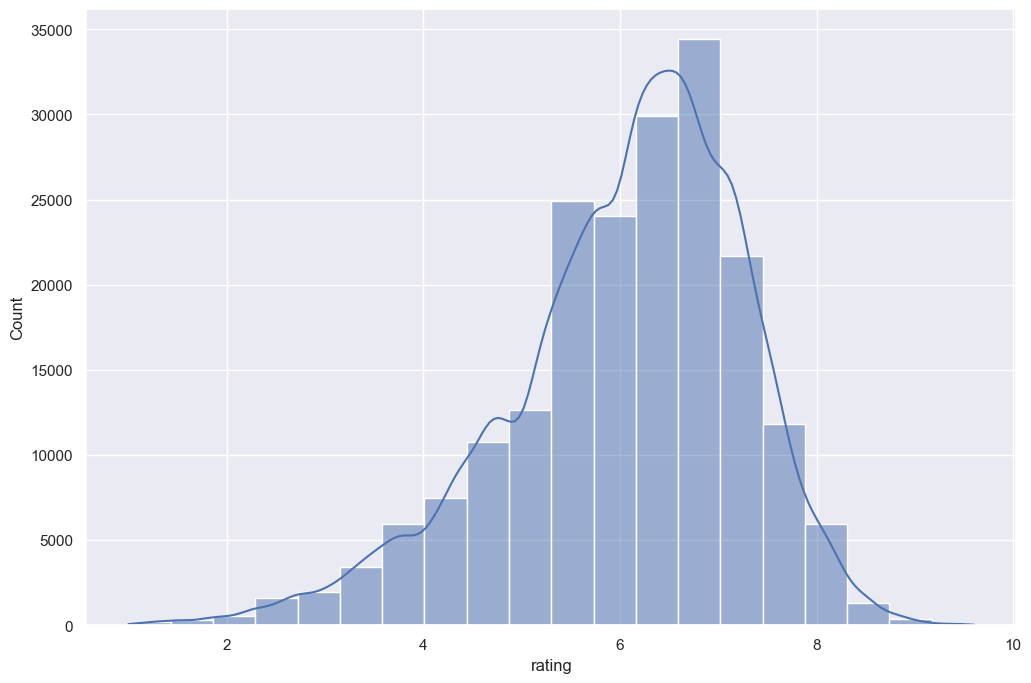

In [26]:
sns.histplot(df['rating'], bins=20, kde=True)

<Axes: xlabel='logvotes', ylabel='rating'>

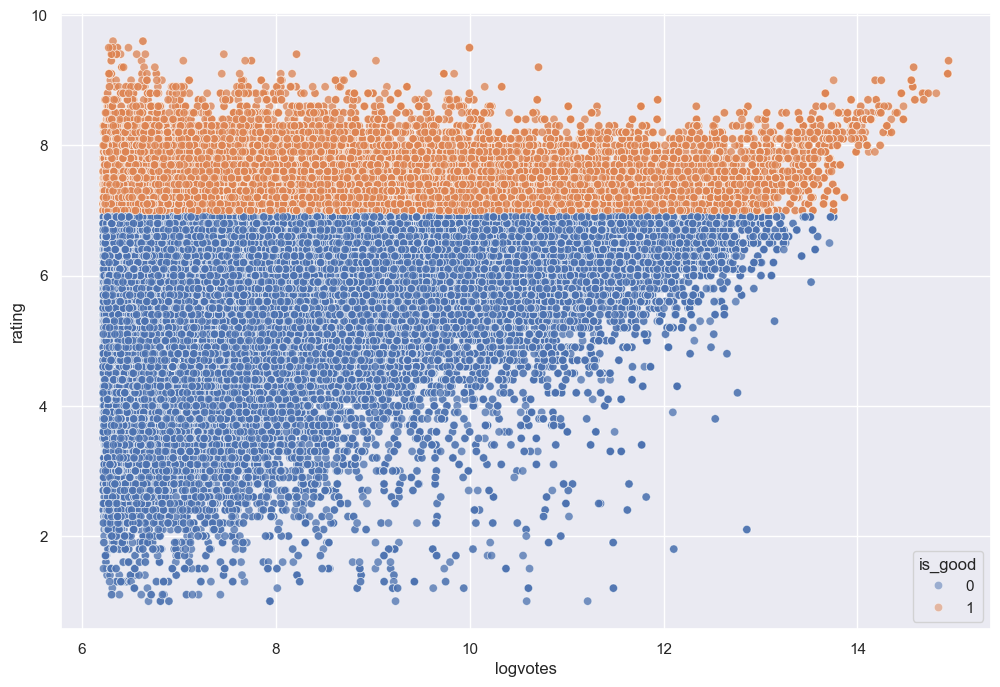

In [27]:
sns.scatterplot(data=df, x='logvotes', y='rating', hue='is_good', alpha=0.5)

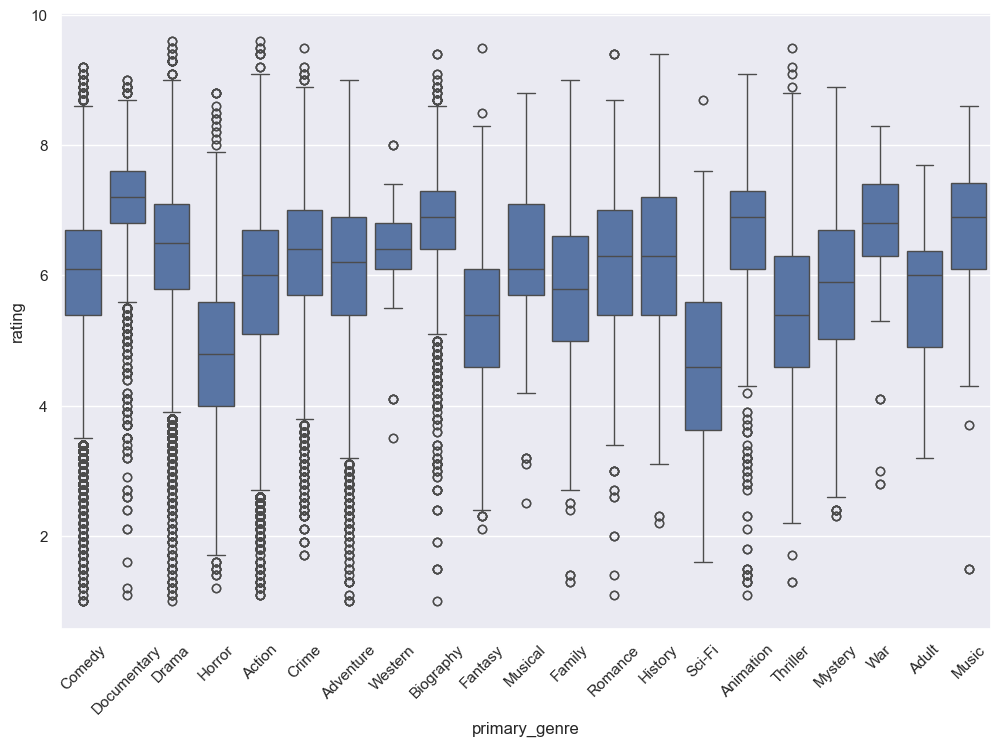

In [28]:
gcounts = df['primary_genre'].value_counts()
common = gcounts[gcounts>=50].index
sns.boxplot(data=df[df['primary_genre'].isin(common)], x='primary_genre', y='rating'); plt.xticks(rotation=45); plt.show()

 Niche Genres Often Outperform Blockbusters

This chart reveals a fascinating insight: the genres with the highest average ratings—**Documentary, Biography, and History**—are often more niche and fact-based. In contrast, crowd-pleasing, mainstream genres like **Action, Sci-Fi, and Horror** tend to have lower average ratings. This suggests that audiences for niche genres may have different expectations or that these films are judged by a different standard.

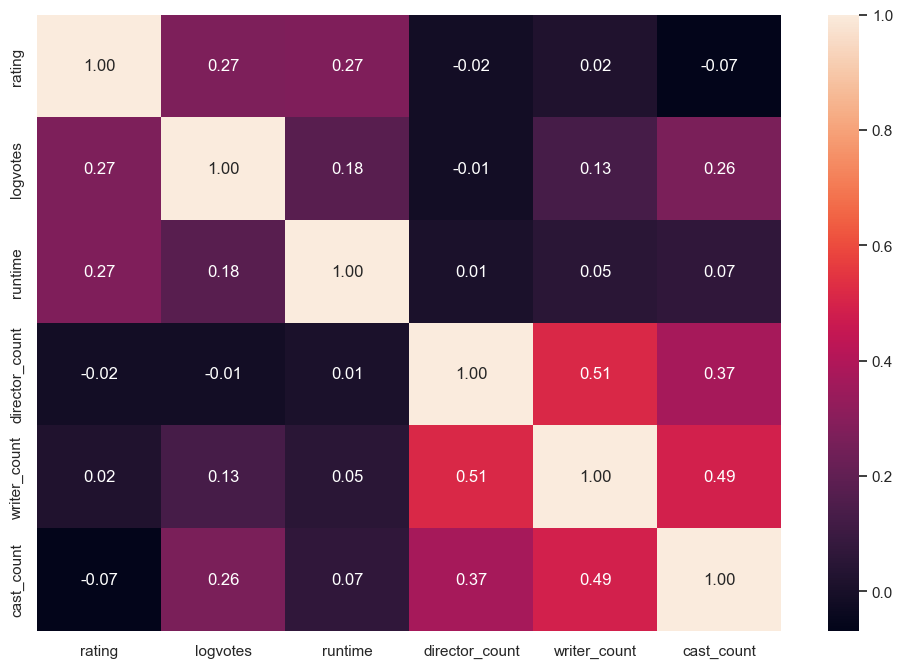

In [29]:
num_cols = ['rating','logvotes','runtime','director_count','writer_count','cast_count']
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f'); plt.show()

Identifying a Director's Breakout Film

How long does it take for a director to make their first big hit? We can identify the career-defining film that launched a director into the mainstream by setting a high bar for both critical acclaim and popularity.

* **Question**: For each director, what was their *first* film to achieve a high rating with a large number of votes?
* **Method**: We will order each director's films chronologically and find the first one that crosses our defined thresholds for `rating` and `votes`.

In [30]:
director_df=df.copy()
director_df.drop(columns=['writers','genre','decade'], inplace=True)
director_df = director_df[['name', 'year', 'title', 'rating', 'votes']].drop_duplicates()

In [31]:
RATING_THRESHOLD = 7.5
VOTES_THRESHOLD = 1500

In [32]:
breakout_candidates = director_df[
    (director_df['rating'] >= RATING_THRESHOLD) &
    (director_df['votes'] >= VOTES_THRESHOLD)
]
breakout_candidates = breakout_candidates.sort_values(by='rating', ascending=False)
breakout_candidates

,name,year,title,rating,votes
178245,Ashwin Kumar,2025,Mahavatar Narsimha,9.5,21988.0
178246,Jayapurna Das,2025,Mahavatar Narsimha,9.5,21988.0
178248,Rudra Pratap Ghosh,2025,Mahavatar Narsimha,9.5,21988.0
180829,Harnav Bir Singh,2025,Guru Nanak Jahaz,9.4,3691.0
180827,Sharan Art,2025,Guru Nanak Jahaz,9.4,3691.0
...,...,...,...,...,...
44714,Milos Forman,1979,Hair,7.5,43048.0
95593,Patrick Süskind,2006,Perfume: The Story of a Murderer,7.5,274312.0
95591,Bernd Eichinger,2006,Perfume: The Story of a Murderer,7.5,274312.0
95590,Andrew Birkin,2006,Perfume: The Story of a Murderer,7.5,274312.0


Genre trend across years

In [33]:
genre_df

,movieID,title,year,runtime,genre,rating,votes,directors,writers,name,cast,category
10705,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres..."
10705,tt0035423,Kate & Leopold,2001,118,Fantasy,6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres..."
10705,tt0035423,Kate & Leopold,2001,118,Romance,6.4,92299.0,nm0003506,"nm0737216,nm0003506",James Mangold,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres..."
10706,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,92299.0,nm0003506,"nm0737216,nm0003506",Steven Rogers,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres..."
10706,tt0035423,Kate & Leopold,2001,118,Fantasy,6.4,92299.0,nm0003506,"nm0737216,nm0003506",Steven Rogers,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","['actress', 'actor', 'actor', 'actor', 'actres..."
...,...,...,...,...,...,...,...,...,...,...,...,...
216019,tt9916362,Coven,2020,92,History,6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."
216020,tt9916362,Coven,2020,92,Drama,6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."
216020,tt9916362,Coven,2020,92,History,6.4,6098.0,nm1893148,"nm1893148,nm3471432",Pablo Agüero,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."
216021,tt9916362,Coven,2020,92,Drama,6.4,6098.0,nm1893148,"nm1893148,nm3471432",Katell Guillou,"['nm3766704', 'nm0107165', 'nm0266723', 'nm106...","['actress', 'actor', 'actor', 'actress', 'actr..."


In [34]:
df['decade']

10705     2000
10706     2000
10707     2000
13076     1980
13077     1980
          ... 
216017    2020
216018    2020
216019    2020
216020    2020
216021    2020
Name: decade, Length: 199331, dtype: int64

In [35]:
movie_grouped=df.groupby(['decade', 'primary_genre']).size().reset_index()
movie_grouped.columns = ['decade', 'primary_genre', 'count']
movie_grouped.sort_values(by=['decade', 'count'], ascending=False)

,decade,primary_genre,count
146,2020,Drama,7857
143,2020,Comedy,7751
139,2020,Action,6931
150,2020,Horror,2420
144,2020,Crime,2043
...,...,...,...
8,1950,Family,23
15,1950,Romance,16
10,1950,Film-Noir,11
17,1950,Thriller,6


In [36]:
genre_per_decade = movie_grouped.pivot(index='decade', columns='primary_genre', values='count')

In [37]:
top_genre_per_decade = movie_grouped.sort_values('count', ascending=False).groupby('decade').head(1)
top_genre_per_decade

,decade,primary_genre,count
123,2010,Comedy,16652
103,2000,Comedy,11039
146,2020,Drama,7857
85,1990,Comedy,5888
64,1980,Comedy,4497
46,1970,Drama,3186
26,1960,Drama,3038
7,1950,Drama,2482


The Most Dominant Genres

<Axes: xlabel='primary_genre'>

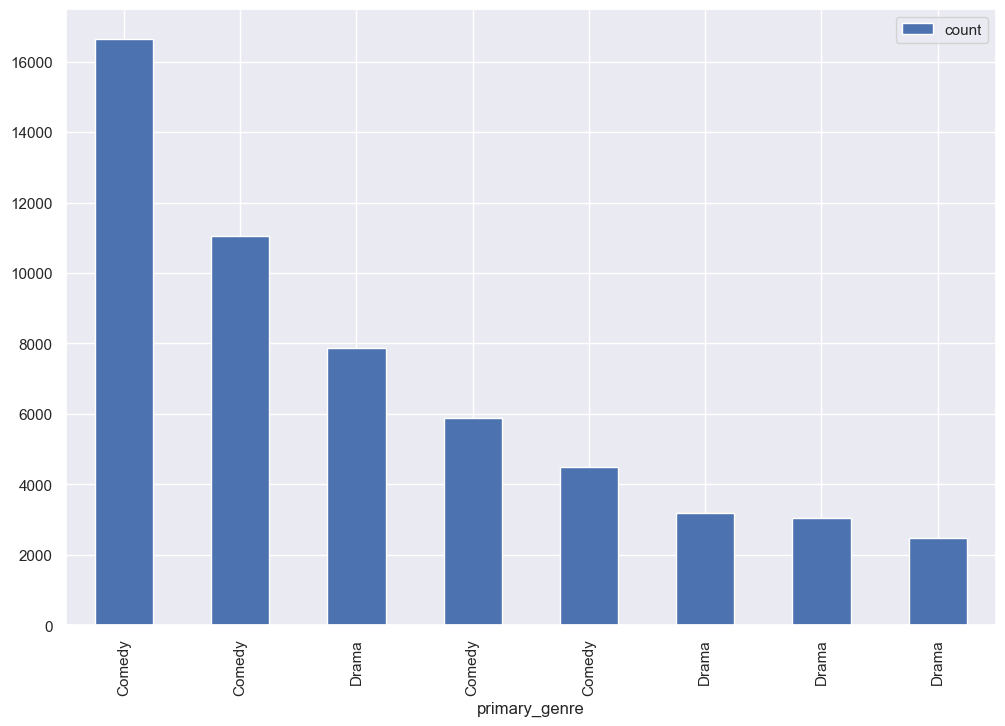

In [38]:
top_genre_per_decade.plot(kind='bar',x='primary_genre',y='count', figsize=(12, 8))

Observation: Drama and Comedy Reign Supreme

Unsurprisingly, **Drama** and **Comedy** are the most produced genres. They are versatile, can be produced at various budget levels, and form the basis for many sub-genres. The high frequency of 'Documentary' is also notable, reflecting a significant category in the dataset.

<Axes: xlabel='decade'>

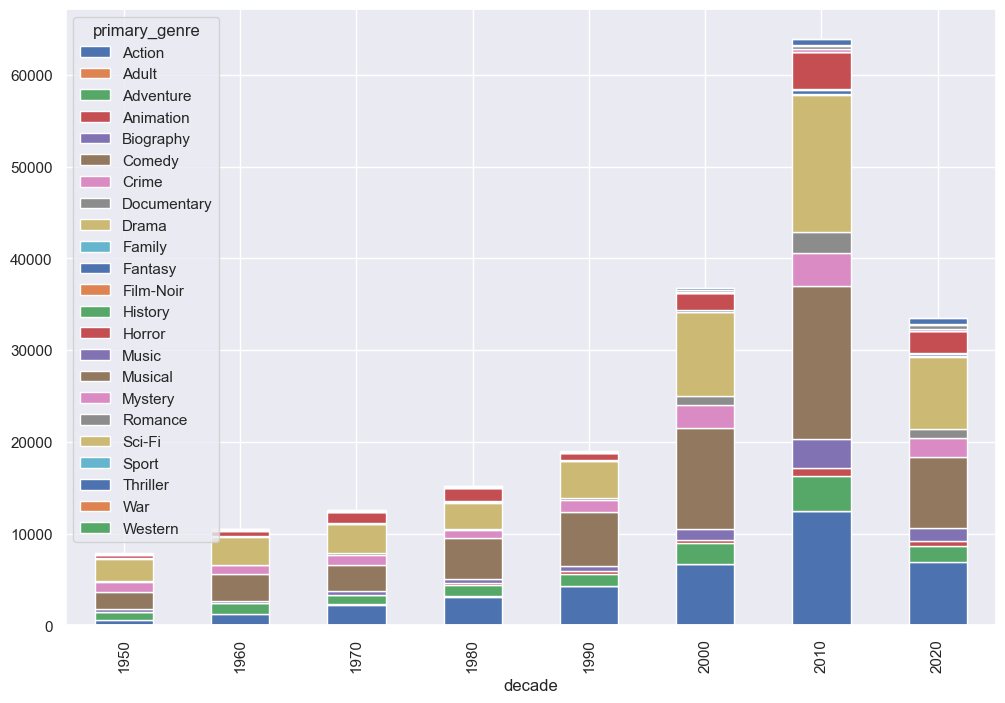

In [39]:
genre_per_decade.plot(kind='bar', stacked=True, figsize=(12, 8))

What is a Genre's "Rating Fingerprint"?

A simple average rating doesn't tell the whole story. Some genres are consistently good, while others are divisive. We want to understand the **personality** of each genre's ratings.

* **Question**: What does the full distribution of ratings look like for top genres?
* **Method**: We will use a **violin plot**. This visualization is perfect because it shows both the range of ratings (like a box plot) and the density of where most ratings are concentrated.

C:\Users\vedan\AppData\Local\Temp\ipykernel_21836\2171156927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


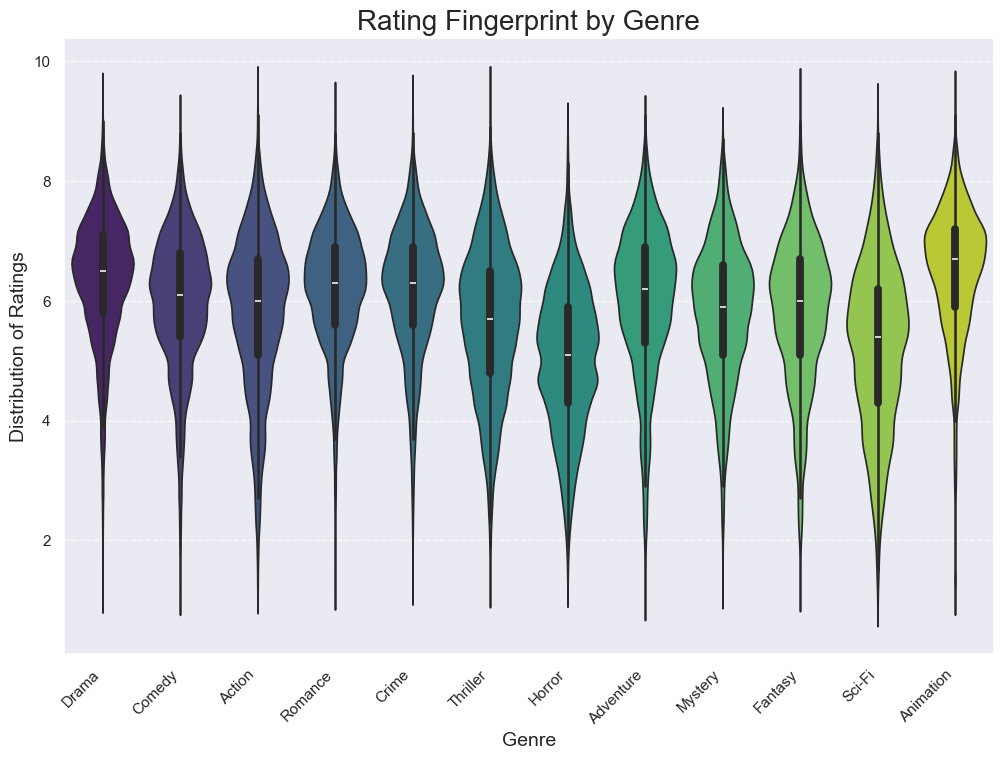

In [40]:
movies_df = df[['movieID', 'genre', 'rating']].drop_duplicates()
top_genres = genre_df['genre'].value_counts().nlargest(12).index
top_genre_df = genre_df[genre_df['genre'].isin(top_genres)]

sns.violinplot(
    data=top_genre_df,
    x='genre',
    y='rating',
    palette='viridis',
    order=top_genres # Order the plot by genre popularity
)

plt.title('Rating Fingerprint by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Distribution of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation: Interpreting the Genre Fingerprints

The violin plot reveals distinct personalities for each genre:

* **"Love-it-or-Hate-it" Genres (e.g., Horror, Sci-Fi)**: These genres have **tall and wide violins**, indicating a huge range of ratings from very bad to very good. The multiple bulges show that audiences are divided; there is no single consensus on what a "good" horror movie is.

* **"Consistently Good" Genres (e.g., Biography, Documentary)**: These violins are **shorter and concentrated at the top** of the rating scale. This indicates high viewer consensus and consistently positive reviews. It's rare to see a biography rated below 6.0.

* **"Mostly Average" Genres (e.g., Comedy, Action)**: These genres show a **massive bulge in the middle** (around 6.0-7.0). This suggests that while there are a few standout classics, the vast majority of these films are considered "just okay" by viewers.

In [41]:
runtime_df=df.groupby('runtime')['rating'].mean().reset_index()
runtime_df.sort_values(by='rating',ascending=False)

,runtime,rating
186,233,8.900000
214,300,8.800000
212,288,8.742857
196,247,8.700000
219,323,8.700000
...,...,...
3,44,5.320000
24,65,5.297315
25,66,5.216667
30,71,5.137135


<Axes: title={'center': 'Average Rating by Runtime'}, xlabel='runtime'>

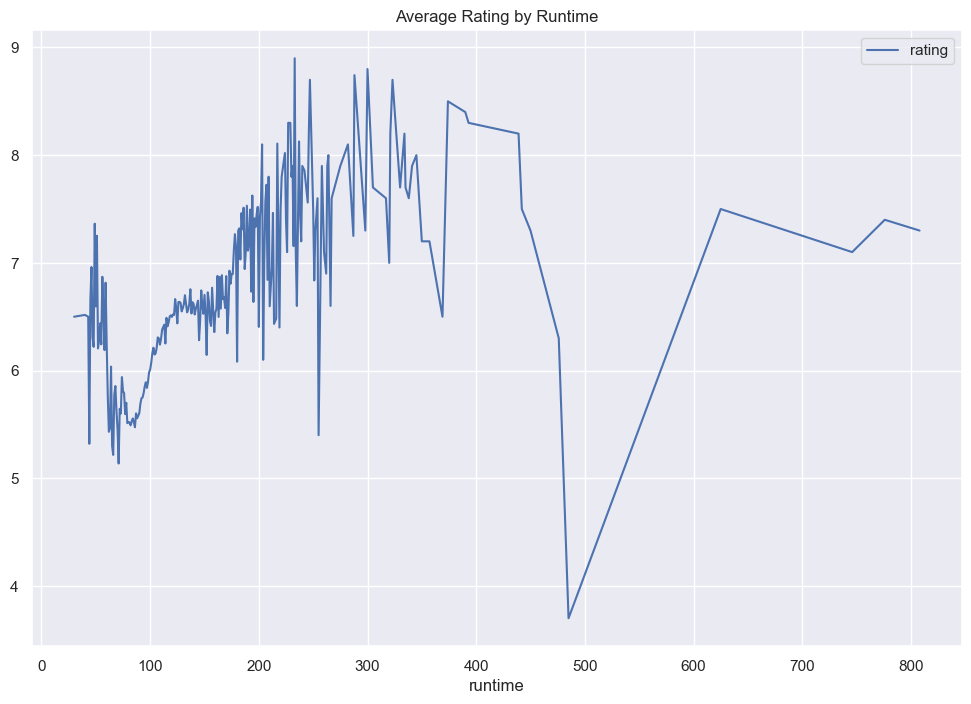

In [42]:
runtime_df.plot(kind='line', x='runtime', y='rating', figsize=(12, 8), title='Average Rating by Runtime')

In [43]:
runtime_df=df.groupby('decade')['runtime'].mean().reset_index()

In [44]:
runtime_df.sort_values('runtime', ascending=False).groupby('decade').head(1)

,decade,runtime
7,2020,109.622101
4,1990,105.543739
5,2000,105.307891
6,2010,104.465125
1,1960,103.767612
2,1970,102.442137
3,1980,101.941468
0,1950,96.447575


In [45]:
runtime_df_counts=df.groupby('runtime')['decade'].value_counts().reset_index() 
runtime_df_counts=runtime_df_counts.sort_values(by='count', ascending=False).groupby('decade').head(1)

<Axes: title={'center': 'Runtime Counts by Decade'}, xlabel='decade'>

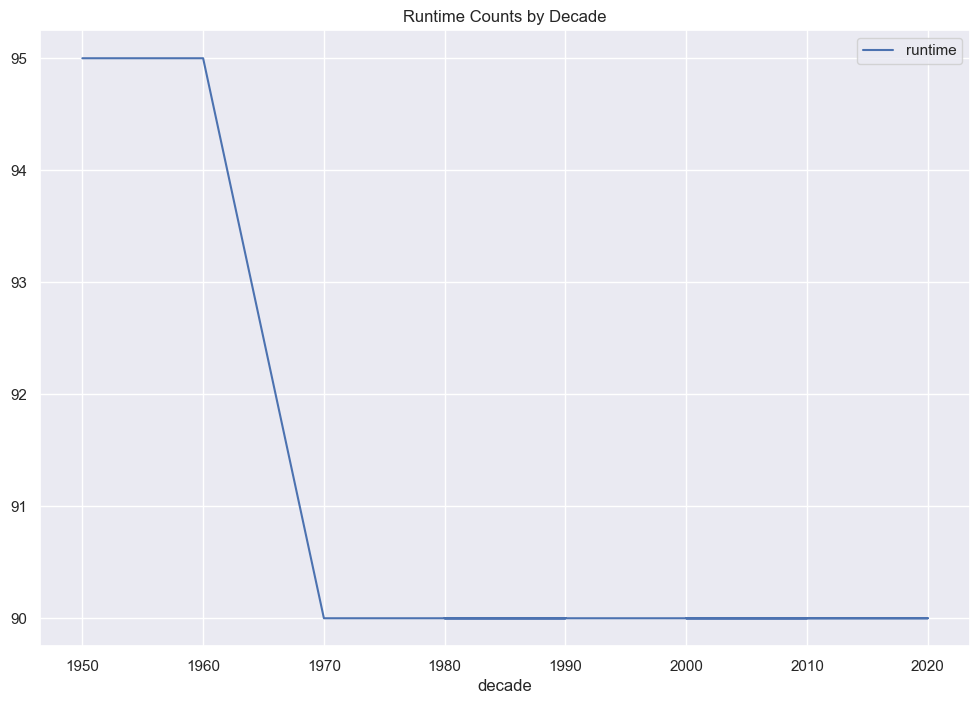

In [46]:
runtime_df_counts.plot(kind='line', x='decade', y='runtime', figsize=(12, 8), title='Runtime Counts by Decade')

<Axes: title={'center': 'Runtime by Decade'}, xlabel='decade'>

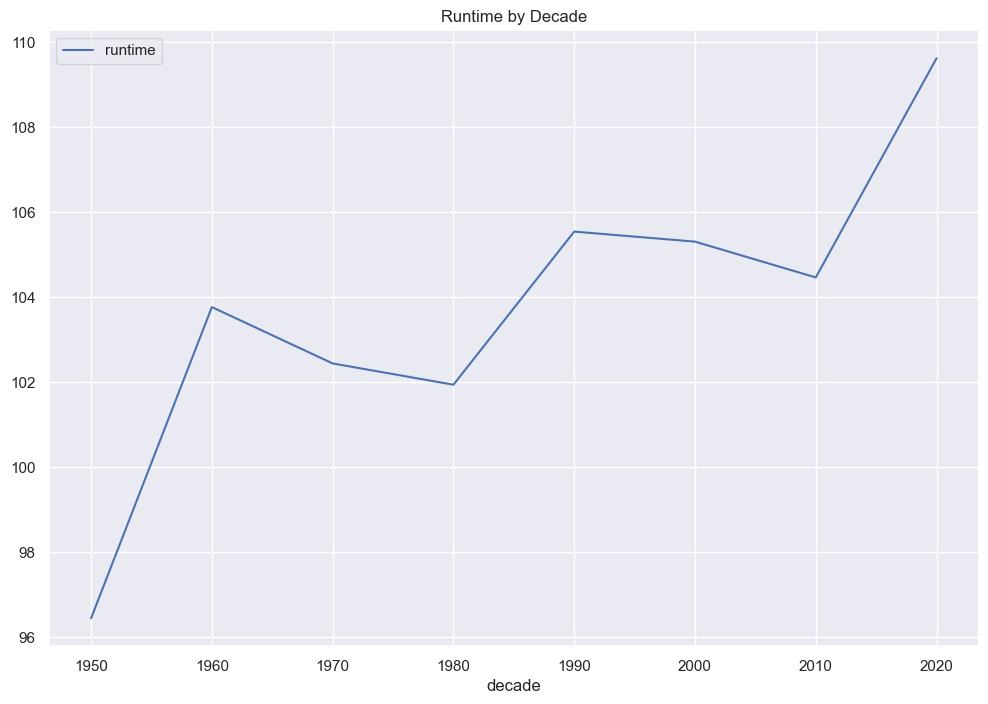

In [50]:
runtime_df.plot(kind='line', x='decade', y='runtime', figsize=(12, 8), title='Runtime by Decade')

Classifying Movie Ratings

Movie ratings are on a continuous scale. To make them easier to interpret and compare, we will bin them into qualitative categories. This helps us talk about movies in terms everyone understands: are they generally considered poor, average, or excellent?

* **Question**: How do movies group together based on their perceived quality?
* **Method**: We will create a `rating_category` column by binning the `averageRating` into four distinct classes:
    * **Poor**: Rating below 5.0
    * **Average**: Rating from 5.0 to 7.0
    * **Good**: Rating from 7.0 to 8.5
    * **Excellent**: Rating above 8.5

In [ ]:
bin_rating=bins=[0, 5, 6, 7, 8.5]
rating_labels = ['Poor (<5)', 'Average (5-7)', 'Good (7-8.5)', 'Excellent (8.5+)']
df['rating_category'] = pd.cut(df['rating'], bins=bin_rating, labels=rating_labels)

Categorizing Movie Runtimes

The `runtimeMinutes` column is a continuous variable, which is useful for precise calculations but can be hard to visualize in broad strokes. To better understand how runtime relates to other features like rating, we will categorize it into intuitive bins. This process, known as **binning**, simplifies the data into meaningful groups.

* **Question**: How can we group movies by their length to analyze trends?
* **Method**: We will create a new column, `runtime_category`, by binning the `runtimeMinutes` into three logical groups:
    * **Short**: Less than 90 minutes.
    * **Medium**: 90 to 120 minutes (the typical feature film length).
    * **Long**: More than 120 minutes.

In [52]:
bin_runtime = [0, 75, 120, 180, df['runtime'].max()]
runtime_labels = ['Short (<75min)', 'Standard (75-120min)', 'Long (120-180min)', 'Epic (>180min)']
df['runtime_category'] = pd.cut(df['runtime'], bins=bin_runtime, labels=runtime_labels)

<Axes: xlabel='runtime', ylabel='Count'>

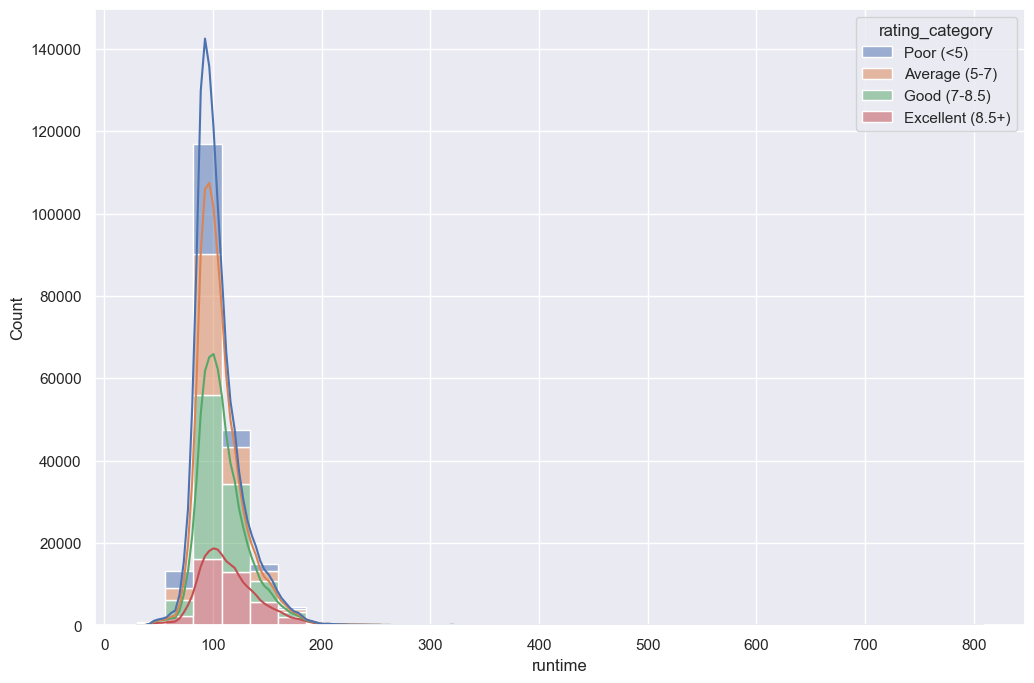

In [60]:
sns.histplot(data=df, x='runtime', hue='rating_category', multiple='stack', bins=30, kde=True)

<Axes: xlabel='runtime', ylabel='rating'>

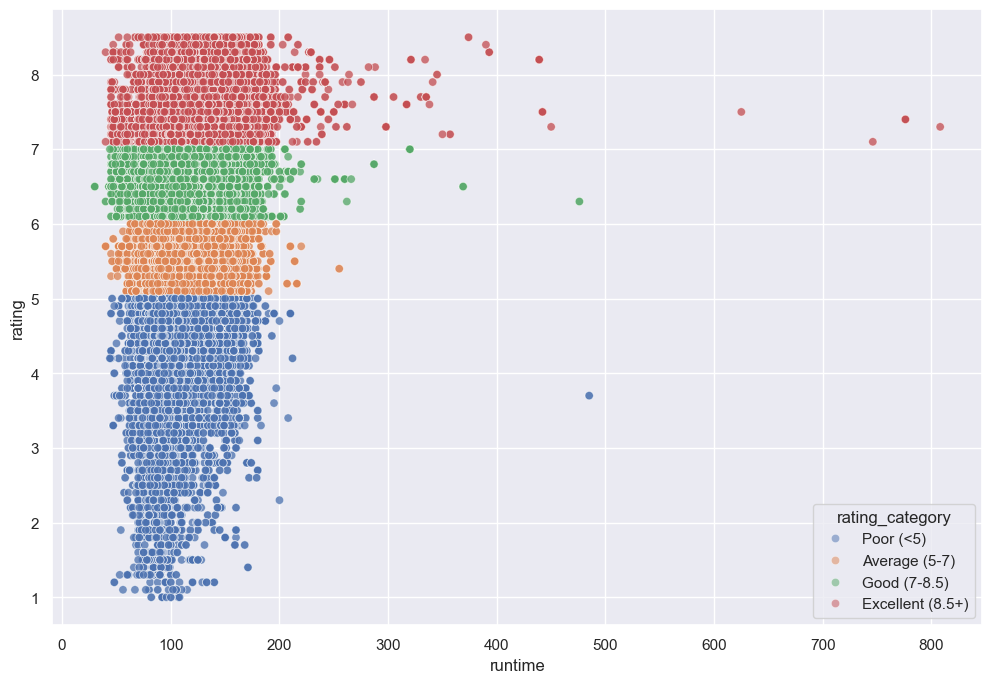

In [ ]:
sns.scatterplot(df, x='rating', y='runtime', hue='rating_category', alpha=0.5)

<Axes: xlabel='votes', ylabel='rating'>

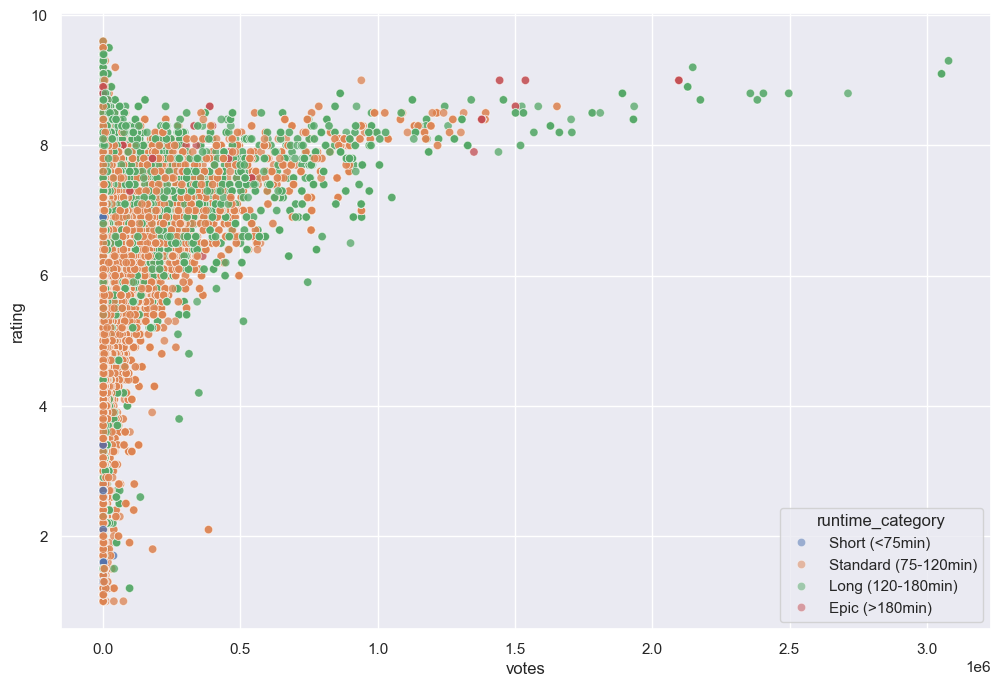

In [65]:
sns.scatterplot(data=df, x='votes', y='rating', hue='runtime_category', alpha=0.5)